In [1]:
__author__ = "@Tssp"
__date__ = "03/01/2021"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5))/2
aursize = (4.3*aur, 4.3)

## ICIR: $\psi^{(b)}\Phi_{(0, 0, 4)}, \psi^{(b)}\Phi_{(4, 0, 0)}$

In [2]:
wxwy = [1, 1.05, 1.1, 1.15, 1.20, 1.25]
ady_up = np.array([5.708198957617527380e-01, 5.766704639003399357e-01, 5.831008618466336779e-01, 0.5892340977799879, 0.5954192051008763, 0.6017787287934351])
ady_down = np.array([5.708198957617527380e-01, 5.438213446870238110e-01, 5.203446640869938689e-01, 0.49978460598090463, 0.48171982795601725, 0.46508794534875464])

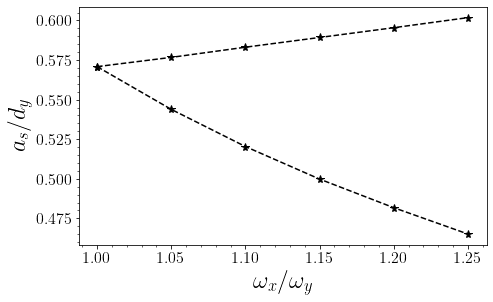

In [4]:
fig, ax = plt.subplots(figsize=aursize)
ax.plot(wxwy, ady_up, 'k--*', markersize=8)
ax.plot(wxwy, ady_down, 'k--*', markersize=8)
#ax.set_xlim(0.997, 1.254)
#ax.set_ylim(0.50, 0.59)
ax.set_xlabel('$\omega_x/\omega_y$')
ax.set_ylabel('$a_s/d_y$')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#plt.grid()
plt.tight_layout()
#fig.savefig('Results/Figures/ICIR_q3d.png', dpi=200)

# Comparison with Theory

In [18]:
ady_theory_up   = np.array([0.554549133969883, 0.5614736841445045, 0.5679678453177158, 0.5744461602892469, 0.5809386740721492, 0.5876183524723355])
ady_theory_down = np.array([0.554549133969883, 0.5269546467549158, 0.5026367338941112, 0.4813460261531235, 0.4626055544713002, 0.44576995027027433])
Cup             = [0.50, 0.52, 0.53, 0.55, 0.56, 0.57]
Cdown           = [0.50, 0.52, 0.50, 0.49, 0.49, 0.48]
print(f'C(0,4,0): {np.mean(Cup)} +- {np.std(Cup)}\nC(4,0,0): {np.mean(Cdown)} +- {np.std(Cdown)}\nC both: {np.mean([Cup, Cdown])} +- {np.std([Cup, Cdown])}')

C(0,4,0): 0.5383333333333333 +- 0.02409472049133493
C(4,0,0): 0.49666666666666665 +- 0.012472191289246483
C both: 0.5175000000000001 +- 0.028321075779944055


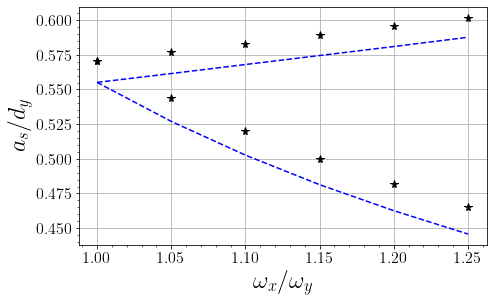

In [9]:
fig, ax = plt.subplots(figsize=aursize)
ax.plot(wxwy, ady_theory_up, 'b--', markersize=8)
ax.plot(wxwy, ady_theory_down, 'b--', markersize=8)
ax.plot(wxwy, ady_up, 'k*', markersize=8)
ax.plot(wxwy, ady_down, 'k*', markersize=8)
#ax.set_xlim(0.997, 1.254)
#ax.set_ylim(0.50, 0.59)
ax.set_xlabel('$\omega_x/\omega_y$')
ax.set_ylabel('$a_s/d_y$')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#plt.grid()
plt.tight_layout()
#fig.savefig('Results/Figures/ICIR_q3d.png', dpi=200)

In [8]:
print(ady_up[0]/ady_theory_up[0], ady_down[0]/ady_theory_down[0])

1.0293405233101551 1.0293405233101551


In [ ]:
ady_theory_C0 = [None, None, None, None, 0.49722526029605196, None]
ady_theory_C2 = [1.3534012403276916, None, None, None, 0.748605436506858, None]

## ICIR: $\psi^{(b)}\Phi_{(2, 0, 0)}$

In [28]:
ady = [3.017377971556954, 2.0990443879308613, 1.6692603651188282]
ady_theory = [3.40147991239906, 2.2696897843454558, 1.7715768483697065]
ady_theory_C0 = [None, None, 0.7783651361948665]
ady_theory_C2 = [None, None, -0.284848366094281]
C = [0.88, 0.85, 0.82]

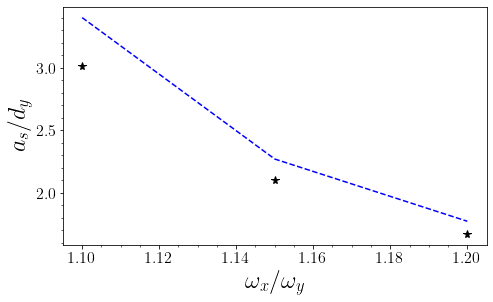

In [31]:
fig, ax = plt.subplots(figsize=aursize)
ax.plot(wxwy[2:-1], ady_theory, 'b--', markersize=8)
ax.plot(wxwy[2:-1], ady, 'k*', markersize=8)
ax.set_xlabel('$\omega_x/\omega_y$')
ax.set_ylabel('$a_s/d_y$')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#plt.grid()
plt.tight_layout()
#fig.savefig('Results/Figures/ICIR_q3d_emergent.png', dpi=200)